In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
transactions_df = pd.read_csv("transactions_data.csv")
cards_df = pd.read_csv("cards_data.csv")
users_df = pd.read_csv("users_data.csv")
mcc_df = pd.read_json("mcc_codes.json", orient="index")
fraud_df = pd.read_json("train_fraud_labels.json")

In [3]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
def data_analysis(df: pd.DataFrame) -> None:
  print("ANÁLISE DE DADOS DO DATAFRAME")
  print("-" * 45)

  print(f"\nQuantidade de linhas e colunas: {df.shape}")
  print(f"\nQuantidade de dados: {len(df)}")
  print('-' * 45)

  print("\nInformações detalhadas:")
  df.info(verbose=True, memory_usage='deep')
  print('-' * 45)

  print("\nEstatísticas descritivas:")
  print(df.describe(include="all"))
  print('-' * 45)

  print("\nContagem de nulos:")
  print(df.isnull().sum().to_frame(name='Nulos'))
  print('-' * 45)

  print("\nContagem de duplicatas:")
  print(df.duplicated().sum())
  print("-" * 45)
  print("Análise concluída.")

#### Análise de Dados - Transações

In [5]:
data_analysis(transactions_df)

ANÁLISE DE DADOS DO DATAFRAME
---------------------------------------------

Quantidade de linhas e colunas: (13305915, 12)

Quantidade de dados: 13305915
---------------------------------------------

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.7 GB
---------------------------------------------

Tipos de dados por coluna:
                  Dtype
id                int64
date             object
client_id         int64
card_id           int6

/tmp/ipykernel_13259/2223233349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Insufficient Balance'),
  Text(1, 0, 'Bad PIN'),
  Text(2, 0, 'Technical Glitch'),
  Text(3, 0, 'Bad Card Number'),
  Text(4, 0, 'Bad Expiration'),
  Text(5, 0, 'Bad CVV'),
  Text(6, 0, 'Bad Zipcode'),
  Text(7, 0, 'Bad PIN,Insufficient Balance'),
  Text(8, 0, 'Insufficient Balance,Technical Glitch'),
  Text(9, 0, 'Bad Card Number,Insufficient Balance'),
  Text(10, 0, 'Bad PIN,Technical Glitch'),
  Text(11, 0, 'Bad CVV,Insufficient Balance'),
  Text(12, 0, 'Bad Expiration,Insufficient Balance'),
  Text(13, 0, 'Bad Card Number,Bad CVV'),
  Text(14, 0, 'Bad Card Number,Bad Expiration'),
  Text(15, 0, 'Bad Expiration,Bad CVV'),
  Text(16, 0, 'Bad Expiration,Technical Glitch'),
  Text(17, 0, 'Bad Card Number,Technical Glitch'),
  Text(18, 0, 'Bad CVV,Technical Glitch'),
  Text(19, 0, 'Bad Zipcode,Insufficient Balance'),
  Text(20, 0, 'Bad Zipcode,Technica

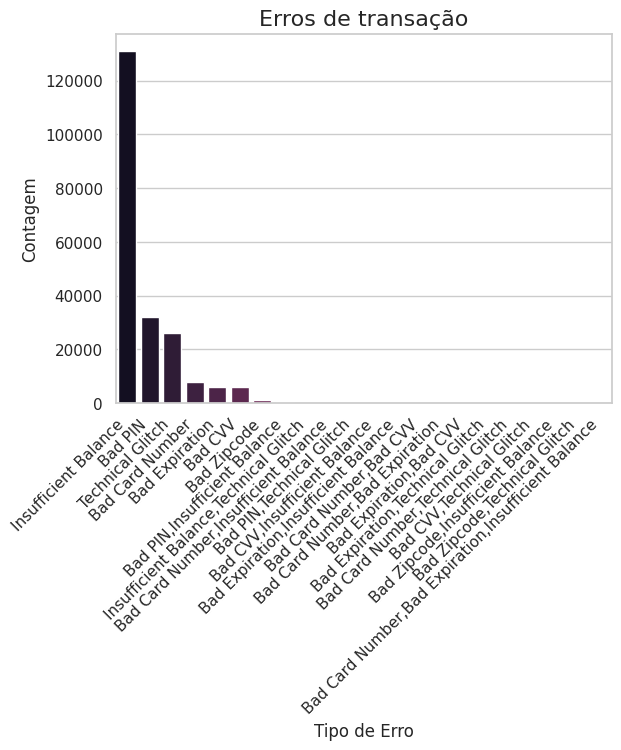

In [6]:
# Gráfico 01 - Distribuição das categorias de erro 

error_counts = transactions_df['errors'].value_counts()

sns.barplot(
  x = error_counts.index,
  y = error_counts.values,
  palette='rocket'
)
plt.title("Erros de transação", fontsize=16)
plt.xlabel("Tipo de Erro", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='amount', ylabel='Count'>

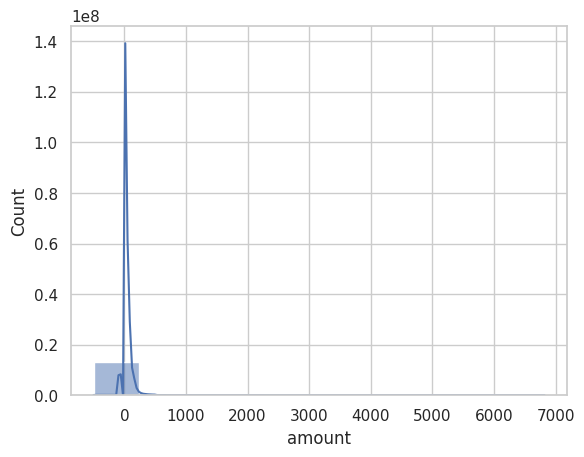

In [7]:
# Gráfico 02 - Distribuição da coluna 'amount' 

amount_numeric = transactions_df['amount']. \
  str.replace("$", "", regex=False).astype(float)

sns.histplot(
  amount_numeric, bins=10, kde=True, log_scale=False)

<Axes: xlabel='amount'>

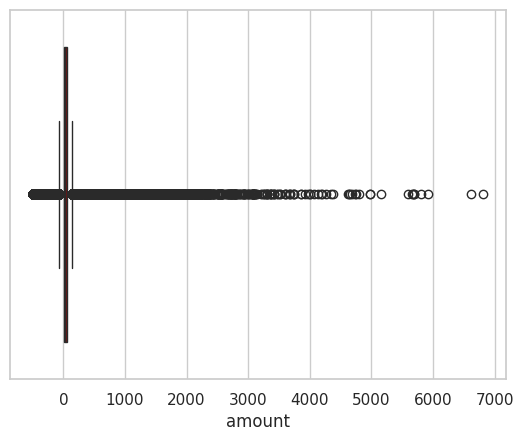

In [8]:
# Gráfico 03 - Identificando outliers e quartis

sns.boxplot(
  x = amount_numeric,
  color='darkred'
)

/tmp/ipykernel_13259/2115194317.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ONLINE'),
  Text(1, 0, 'Houston'),
  Text(2, 0, 'Miami'),
  Text(3, 0, 'Brooklyn'),
  Text(4, 0, 'Los Angeles'),
  Text(5, 0, 'Chicago'),
  Text(6, 0, 'Dallas'),
  Text(7, 0, 'Louisville'),
  Text(8, 0, 'Philadelphia'),
  Text(9, 0, 'San Antonio')])

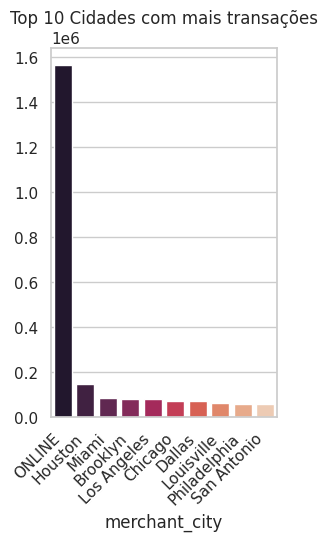

In [9]:
# Gráfico 04 - 10 locais com mais transações

top_places = transactions_df['merchant_city'].value_counts().head(10)
plt.subplot(1, 2, 1)
sns.barplot(
  x = top_places.index,
  y = top_places.values,
  palette="rocket"
)
plt.title("Top 10 Cidades com mais transações")
plt.xticks(rotation=45, ha='right')

/tmp/ipykernel_13259/2150131221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'OH'),
  Text(5, 0, 'IL'),
  Text(6, 0, 'NC'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'MI'),
  Text(9, 0, 'GA')])

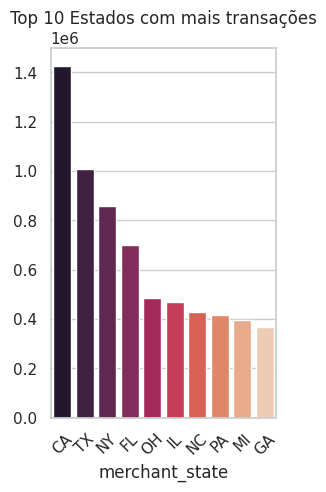

In [10]:
# Gráfico 05 - 10 estados com mais transações

top_states = transactions_df['merchant_state'].value_counts().head(10)
plt.subplot(1, 2, 2)
sns.barplot(
  x = top_states.index,
  y = top_states.values,
  palette="rocket"
)
plt.title("Top 10 Estados com mais transações")
plt.xticks(rotation=45)

/tmp/ipykernel_13259/1251729985.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='use_chip', y='amount', data=plot_df, palette="coolwarm")


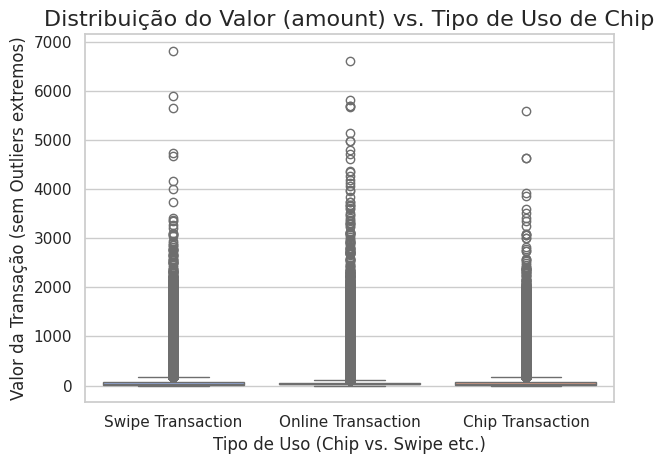

In [11]:
# Gráfico 6 - Valor da transação por tipo de uso do cartão

amount_numeric = transactions_df['amount'].astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)

plot_df = pd.DataFrame({
        'amount': amount_numeric,
        'use_chip': transactions_df['use_chip']
    })
  
sns.boxplot(x='use_chip', y='amount', data=plot_df, palette="coolwarm")
    
plt.title("Distribuição do Valor (amount) vs. Tipo de Uso de Chip", fontsize=16)
plt.xlabel("Tipo de Uso (Chip vs. Swipe etc.)", fontsize=12)
plt.ylabel("Valor da Transação (sem Outliers extremos)", fontsize=12)
plt.tight_layout()
plt.show()

#### Análise de Dados - Cartões

In [12]:
data_analysis(cards_df)

ANÁLISE DE DADOS DO DATAFRAME
---------------------------------------------

Quantidade de linhas e colunas: (6146, 13)

Quantidade de dados: 6146
---------------------------------------------

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pi

/tmp/ipykernel_13259/2150750438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Contagem de cartões')

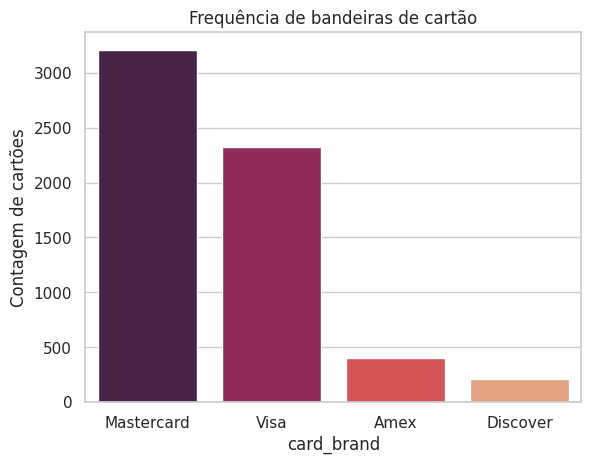

In [13]:
# Gráfico 01 - Frequência de bandeiras de cartão 

brand_counts = cards_df['card_brand'].value_counts()
sns.barplot(
  x = brand_counts.index,
  y = brand_counts.values, 
  palette="rocket"
)
plt.title("Frequência de bandeiras de cartão")
plt.ylabel("Contagem de cartões")

/tmp/ipykernel_13259/1213168474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Contagem de Cartões')

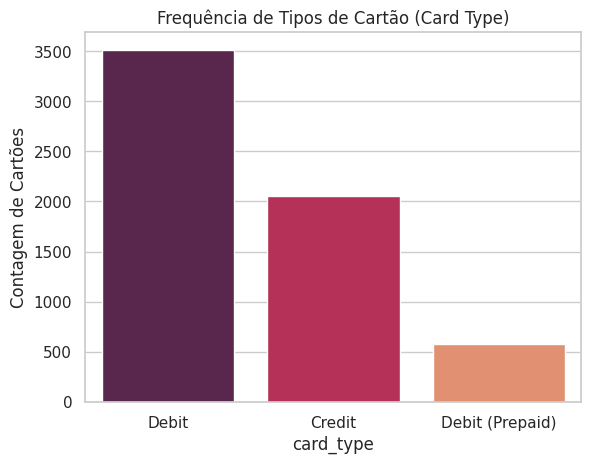

In [14]:
# Gráfico 02 - Frequência de tipos de cartão

type_counts = cards_df['card_type'].value_counts()
sns.barplot(
  x = type_counts.index,
  y = type_counts.values,
  palette='rocket'
)
plt.title("Frequência de Tipos de Cartão (Card Type)")
plt.ylabel("Contagem de Cartões")

/tmp/ipykernel_13259/2677920280.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


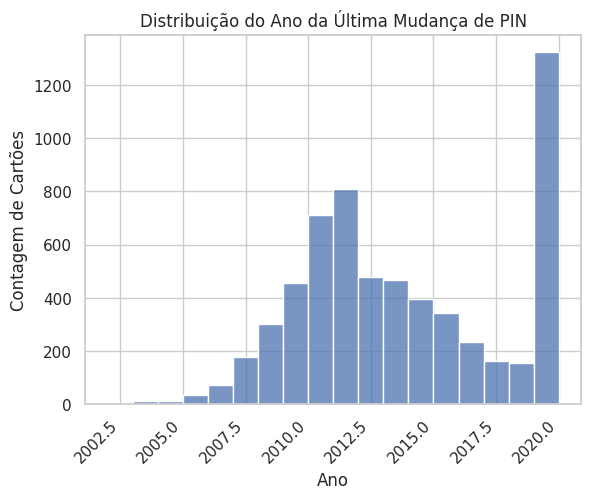

In [15]:
# Gráfico 03 - Distribuição do ano da última mudança de pin
sns.histplot(
  cards_df['year_pin_last_changed'], 
  bins=np.arange(cards_df['year_pin_last_changed'].min(), 
  cards_df['year_pin_last_changed'].max() + 1, 1), 
  kde=False, 
  palette='rocket'
)

plt.title("Distribuição do Ano da Última Mudança de PIN")
plt.xlabel("Ano")
plt.ylabel("Contagem de Cartões")
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipykernel_13259/1653418019.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


Text(0, 0.5, 'Contagem de Cartões')

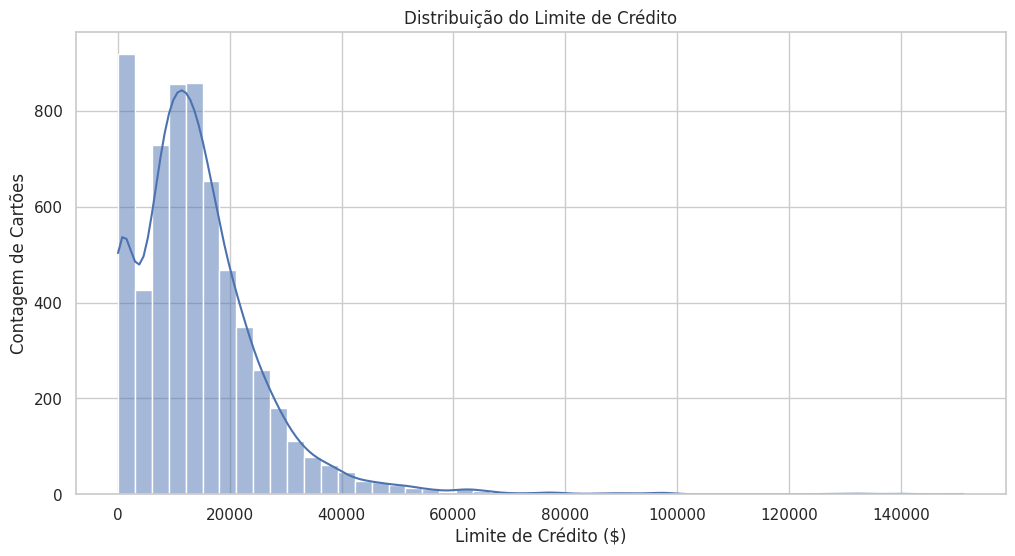

In [16]:
# Gráfico 04: Distribuição do Limite de Crédito
limit_numeric = cards_df['credit_limit'] \
  .astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)
    
plt.figure(figsize=(12, 6))
    
sns.histplot(
  limit_numeric, 
  bins=50, 
  kde=True, 
  log_scale=False, 
  palette='rocket'
)
    
plt.title("Distribuição do Limite de Crédito")
plt.xlabel("Limite de Crédito ($)")
plt.ylabel("Contagem de Cartões")

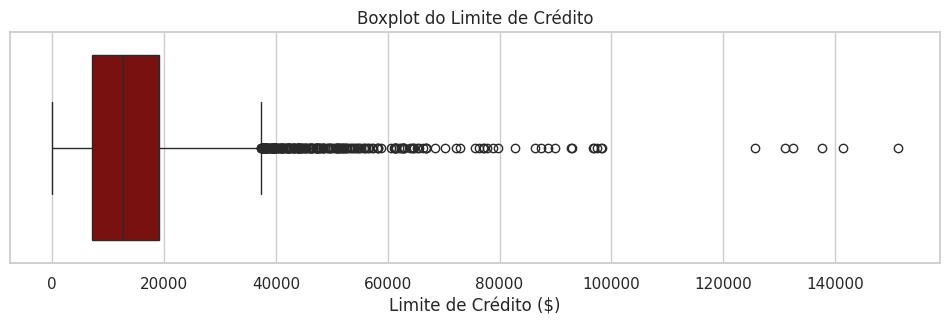

In [17]:
# Gráfico 05: Boxplot para média e outliers do limite de crédito

plt.figure(figsize=(12, 3))
sns.boxplot(x=limit_numeric, color='darkred')
plt.title("Boxplot do Limite de Crédito")
plt.xlabel("Limite de Crédito ($)")
plt.show()

/tmp/ipykernel_13259/1744935712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


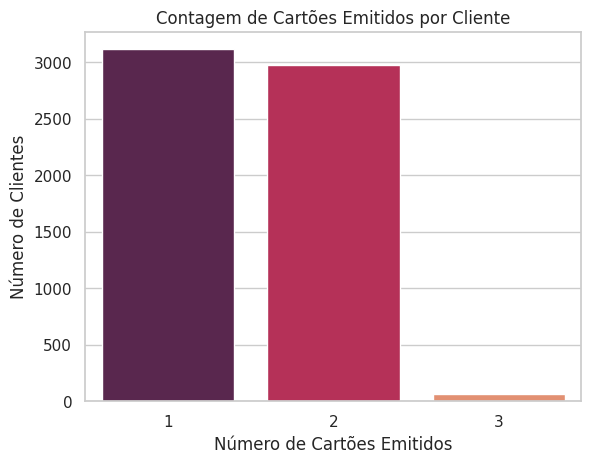

In [18]:
# Gráfico 06 - Contagem de cartões por clientes

num_cards_counts = cards_df['num_cards_issued'].value_counts().sort_index()

sns.barplot(
  x=num_cards_counts.index, 
  y=num_cards_counts.values, 
  palette="rocket"
)
plt.title("Contagem de Cartões Emitidos por Cliente")
plt.xlabel("Número de Cartões Emitidos")
plt.ylabel("Número de Clientes")
plt.show()

#### Análise de Dados - Usuários

In [19]:
data_analysis(users_df)

ANÁLISE DE DADOS DO DATAFRAME
---------------------------------------------

Quantidade de linhas e colunas: (2000, 14)

Quantidade de dados: 2000
---------------------------------------------

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12

Text(0, 0.5, 'Contagem de Clientes')

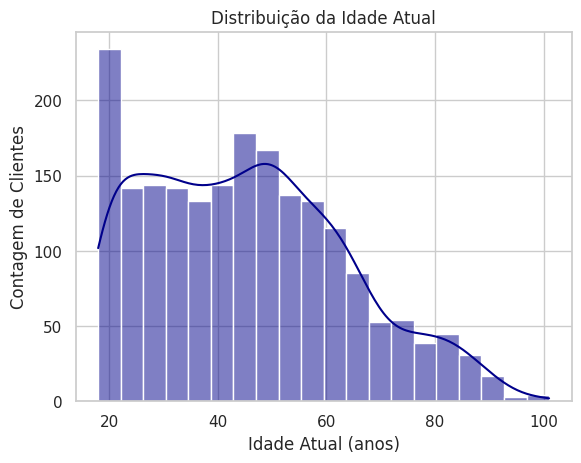

In [20]:
# Gráfico 01 - Distribuição de idades

sns.histplot(
  users_df['current_age'], 
  bins=20, 
  kde=True, 
  color='darkblue'
)
plt.title("Distribuição da Idade Atual")
plt.xlabel("Idade Atual (anos)")
plt.ylabel("Contagem de Clientes")

Text(0, 0.5, 'Contagem de Clientes')

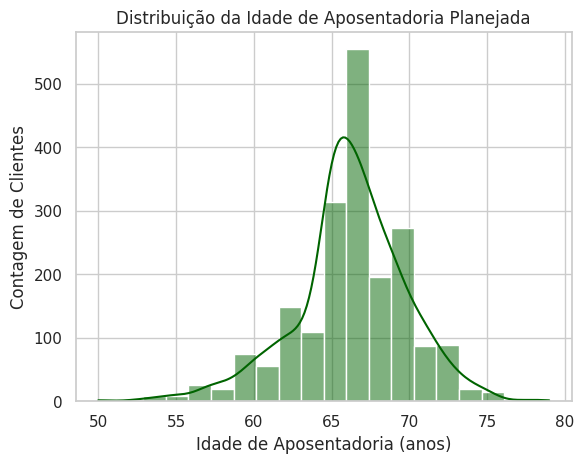

In [21]:
# Gráfico 02 - Distribuição de idade de aposentadoria planejada
sns.histplot(
  users_df['retirement_age'], 
  bins=20, 
  kde=True, 
  color='darkgreen'
)
plt.title("Distribuição da Idade de Aposentadoria Planejada")
plt.xlabel("Idade de Aposentadoria (anos)")
plt.ylabel("Contagem de Clientes")

/tmp/ipykernel_13259/1235832019.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(income_numeric, bins=50, kde=True, palette='rocket')


(0.0, 231627.87)

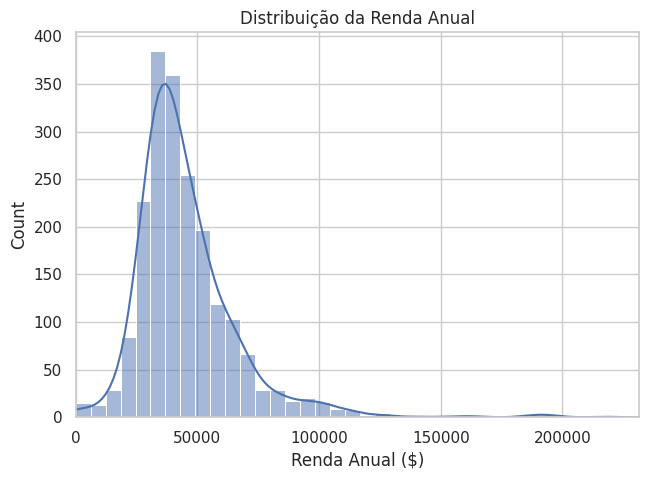

In [22]:
# Gráfico 03 - Distribuição de renda e dívida
def clean_and_convert(series):
  return series.astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)
    
income_numeric = clean_and_convert(users_df['yearly_income'])
debt_numeric = clean_and_convert(users_df['total_debt'])
    
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.histplot(income_numeric, bins=50, kde=True, palette='rocket')
plt.title("Distribuição da Renda Anual")
plt.xlabel("Renda Anual ($)")
plt.xlim(0, debt_numeric.quantile(0.99))

/tmp/ipykernel_13259/2351368557.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(debt_numeric, bins=50, kde=True, palette='rocket')


(0.0, 231627.87)

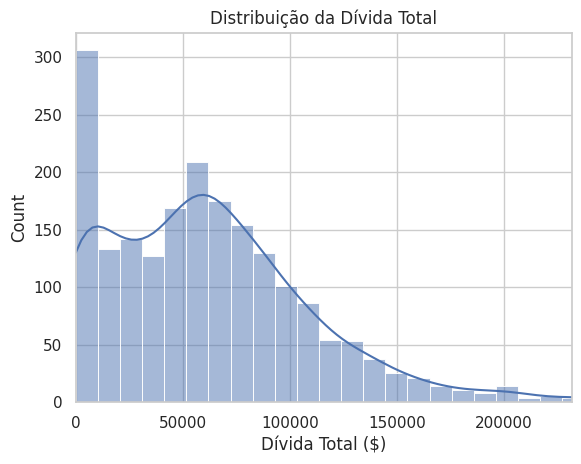

In [23]:
# Gráfico 04 - Distribuição da dívida
sns.histplot(debt_numeric, bins=50, kde=True, palette='rocket')
plt.title("Distribuição da Dívida Total")
plt.xlabel("Dívida Total ($)")
plt.xlim(0, debt_numeric.quantile(0.99))

/tmp/ipykernel_13259/3114010318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Text(0, 0.5, 'Pontuação de Crédito (Credit Score)')

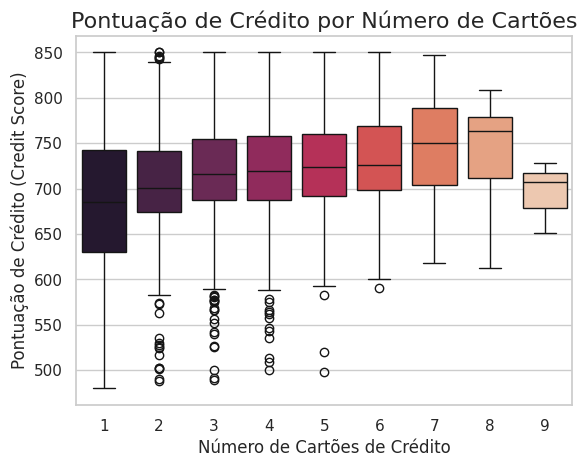

In [24]:
# Gráfico 05 - Pontuação de crédito por número de cartões

sns.boxplot(
  x=users_df['num_credit_cards'], 
  y=users_df['credit_score'], 
  palette="rocket"
)
plt.title("Pontuação de Crédito por Número de Cartões", fontsize=16)
plt.xlabel("Número de Cartões de Crédito", fontsize=12)
plt.ylabel("Pontuação de Crédito (Credit Score)", fontsize=12)

/tmp/ipykernel_13259/2390552093.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


Text(0, 0.5, 'Latitude')

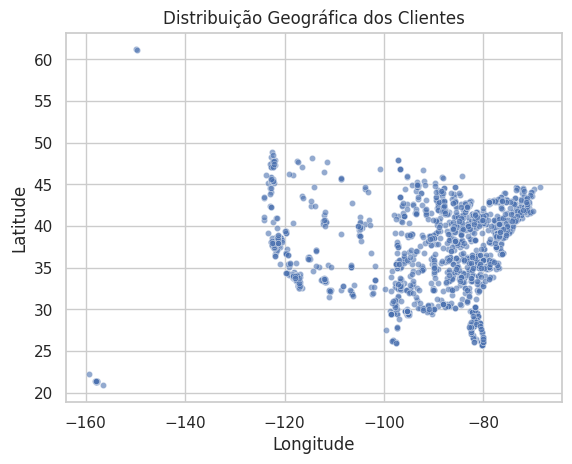

In [25]:
# Gráfico 06 - Distribuição geográfica de clientes
sns.scatterplot(
  x=users_df['longitude'], 
  y=users_df['latitude'], 
  s=20, 
  alpha=0.6, 
  palette='rocket'
)
plt.title("Distribuição Geográfica dos Clientes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


#### Análise de Dados - Códigos de mercantes

In [26]:
data_analysis(mcc_df)

ANÁLISE DE DADOS DO DATAFRAME
---------------------------------------------

Quantidade de linhas e colunas: (109, 1)

Quantidade de dados: 109
---------------------------------------------

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 5812 to 5733
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       109 non-null    object
dtypes: object(1)
memory usage: 8.9 KB
---------------------------------------------

Tipos de dados por coluna:
    Dtype
0  object
---------------------------------------------

Estatísticas descritivas:
                         0
count                  109
unique                 108
top     Passenger Railways
freq                     2
---------------------------------------------

Contagem de nulos:
   Nulos
0      0
---------------------------------------------

Contagem de duplicatas:
1
---------------------------------------------
Análise concluída.


/tmp/ipykernel_13259/973271907.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_descriptions.index, y=duplicate_descriptions.values, palette="Reds")


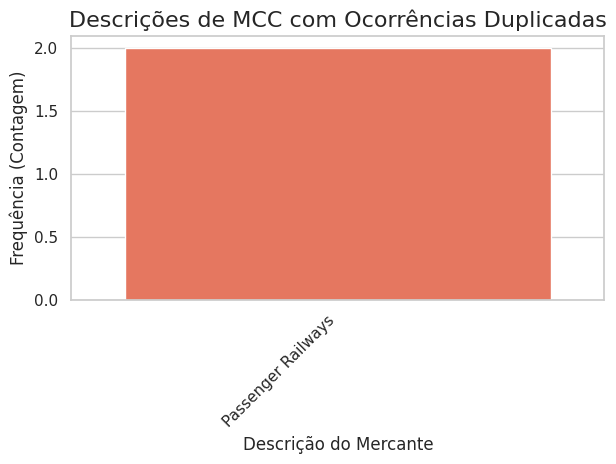

In [27]:
# Gráfico 01 

description_counts = mcc_df[0].value_counts()

duplicate_descriptions = description_counts[description_counts > 1]

if not duplicate_descriptions.empty:
    sns.barplot(x=duplicate_descriptions.index, y=duplicate_descriptions.values, palette="Reds")
    plt.title("Descrições de MCC com Ocorrências Duplicadas", fontsize=16)
    plt.xlabel("Descrição do Mercante", fontsize=12)
    plt.ylabel("Frequência (Contagem)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("AVISO: Nenhuma descrição de mercante aparece mais de uma vez no conjunto de dados.")

Text(0, 0.5, 'Contagem de Códigos')

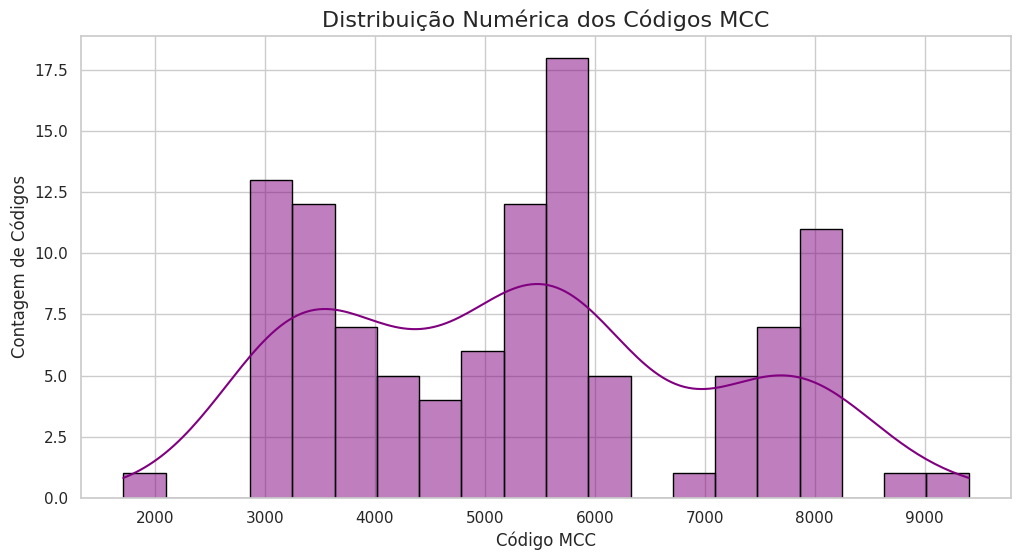

In [28]:
mcc_temp = mcc_df.copy()
mcc_temp.index.name = 'mcc_code'
mcc_temp.reset_index(inplace=True)


mcc_temp['mcc_code'] = pd.to_numeric(mcc_temp['mcc_code'], errors='coerce').astype('Int64')
    
plt.figure(figsize=(12, 6))
    
sns.histplot(mcc_temp['mcc_code'], bins=20, kde=True, color='purple', edgecolor='black')
    
plt.title("Distribuição Numérica dos Códigos MCC", fontsize=16)
plt.xlabel("Código MCC", fontsize=12)
plt.ylabel("Contagem de Códigos", fontsize=12)

#### Análise de Dados - Fraudes com etiqueta

In [29]:
data_analysis(fraud_df)

ANÁLISE DE DADOS DO DATAFRAME
---------------------------------------------

Quantidade de linhas e colunas: (8914963, 1)

Quantidade de dados: 8914963
---------------------------------------------

Informações detalhadas:
<class 'pandas.core.frame.DataFrame'>
Index: 8914963 entries, 10649266 to 15151926
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   target  object
dtypes: object(1)
memory usage: 501.6 MB
---------------------------------------------

Tipos de dados por coluna:
         Dtype
target  object
---------------------------------------------

Estatísticas descritivas:
         target
count   8914963
unique        2
top          No
freq    8901631
---------------------------------------------

Contagem de nulos:
        Nulos
target      0
---------------------------------------------

Contagem de duplicatas:
8914961
---------------------------------------------
Análise concluída.


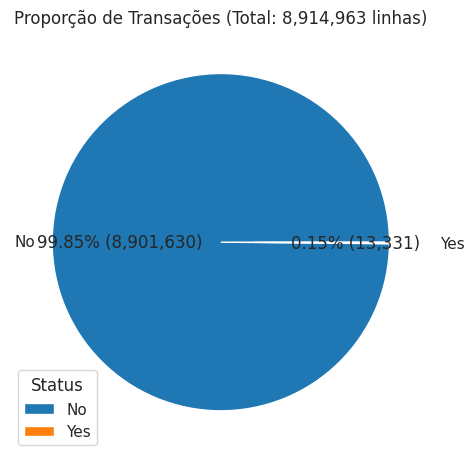

--------------------------------------------------
Total de Fraudes ('Yes'): 13,332
Porcentagem de Fraude: 0.1495%
--------------------------------------------------


In [30]:
# Gráfico 1: Desbalanceamento de Classes (Fraude vs. Não Fraude)
target_counts = fraud_df['target'].value_counts()

total = target_counts.sum()
percentages = (target_counts / total) * 100

plt.pie(target_counts, 
        labels=target_counts.index, 
        autopct=lambda p: f'{p:.2f}% ({int(p*total/100):,})', 
        colors=['#1f77b4', '#ff7f0e'],
        explode=[0, 0.2] 
       )

plt.title(f"Proporção de Transações (Total: {total:,} linhas)")
plt.legend(loc='lower left', title="Status")
plt.tight_layout()
plt.show()

print("-" * 50)
print(f"Total de Fraudes ('Yes'): {target_counts.get('Yes', 0):,}")
print(f"Porcentagem de Fraude: {percentages.get('Yes', 0):.4f}%")
print("-" * 50)

/tmp/ipykernel_13259/360578951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


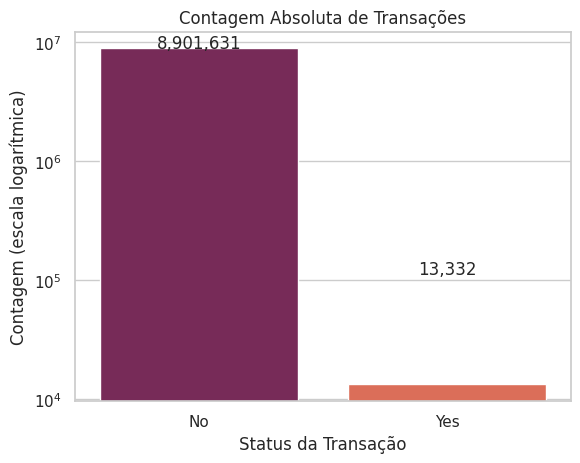

In [31]:
# Gráfico 2: Frequência Simples da Classe Minoritária
sns.barplot(
  x=target_counts.index, 
  y=target_counts.values, 
  palette='rocket'
)

plt.title("Contagem Absoluta de Transações")
plt.xlabel("Status da Transação")
plt.ylabel("Contagem (escala logarítmica)")
plt.yscale('log') 

for i, count in enumerate(target_counts.values):
    plt.text(i, count + 100000, f'{count:,}', ha='center')